Logistic Regression - Diabetes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
diabetes_train = pd.read_csv('/Users/patrickorourke/Desktop/diabetes-classification/train.csv')
diabetes_test = pd.read_csv('/Users/patrickorourke/Desktop/diabetes-classification/test.csv')
diabetes_train = diabetes_train.T #### Need to transpose the initial dataframe so the input vector is of the form
diabetes_test = diabetes_test.T 
##### (Dimension fo input features, number of training examples)
##print(diabetes_dataset.shape)     #(10, 614)
#X = diabetes_dataset.iloc[[0,1,2,3,4,5,6,7,8], :]
X_train = diabetes_train.iloc[:9,:]  ### (9, 614)
X_test = diabetes_test.iloc[:9,:]  ### (9, 614)
##print(X.shape)


Y_train = diabetes_train.iloc[[9],:] ### (1, 614)
print(Y_train)




training_examples = X_train.shape[0]
test_examples = X_test.shape[0]

m_train = Y_train.shape[1]
m_test = X_test.shape[1]


print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
#print ("Y_test shape: " + str(Y_test.shape))

w = np.zeros((training_examples,1))



b = 0
print(b)

alpha = 0.00001

J = 0

m = X_train.shape[1]
n = X_test.shape[1]

print(m)


a = 0.00003

Y_Prediction = []

#iterations = 1000

          0    1    2    3    4    5    6    7    8    9    ...  604  605  \
diabetes  0.0  1.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   

          606  607  608  609  610  611  612  613  
diabetes  1.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  

[1 rows x 614 columns]
Number of training examples: m_train = 614
Number of testing examples: m_test = 154
X_train shape: (9, 614)
Y_train shape: (1, 614)
X_test shape: (9, 154)
0
614


In [3]:
### Standardize data
X_test = X_test
X_train = X_train
Y_train = Y_train

In [4]:
class logistic_regression:

    def __init__(self,alpha,iterations):
        self.alpha = alpha
        self.iterations = iterations

    def forward_propagation(self,w,b,X,Y,J):
       # print("Shape of w: ", w.shape)  ### (9, 1)
       # print("Shape of X: ", X.shape)  ### (9, 614)
       # print("Shape of b: ", b)        ### 0
        z = np.dot(w.T,X) + b
        #print(z) # [[0. 0. 0. 0. 0. 0. 0. 0. 0.]]
      #  print("Shape of z: ", z.shape)  ### (1, 614)
        a = 1/(1 + np.exp(-z))
      #  print("Shape of a: ", a.shape)  ### (1, 614)
        assert(a.shape == (1, m))

      #  a = np.squeeze(np.asarray(a))

      #  print("Shape of Y: ", Y.shape)  ### (1, 614)

        J = np.sum((np.dot(Y.T,np.log(a)) + np.dot((1 - Y.T),np.log(1 - a)))) * (-1.0 / m)

        assert(J.shape == ())
       # print("J: ", J)
      # print("Shape of J: ", J.shape)  ### (614,)
     #   J = np.squeeze(J)
      #  print("The value of J: ", J)
        ###assert(J.shape == ())
        return a,J 

    def backward_propagation(self,alpha,m,a,X,Y,w,b):    
      #  print("Original Shape of w: ", w.shape)  ### (9,1)
      #  print("Original Shape of b: ", b)        ### 0     
        dz = a - Y     ##### dJ/dz
       # print("Shape of dz: ", dz.shape)         ### (1, 614)
       # print("Shape of X: ", X.shape)           ### (9, 614)
        dw = (1 / m) * (np.dot(X,dz.T))
      #  print("Shape of dw: ", dw.shape)         ### (9, 1) 
        db = (1.0 / m) * (np.sum(dz))
        assert(dw.shape == w.shape)
        assert(db.dtype == float)
        db = db.shape[0]
       # print("Shape of db: ", db)         ### (614,)
        w -= (alpha * dw)
      #  print("Shape of w: ", w.shape)           ### (9, 1) 
        b -= (alpha * db)
       # print("New Shape of b: ", b)       ### (614,)
        return w,b




    def train(self,w,b,X,Y,J,alpha,iterations):

        costs = []

        for i in range(iterations):

            a, J = self.forward_propagation(w,b,X,Y,J)
            w, b = self.backward_propagation(alpha, m, a, X, Y, w, b)

            # Record the costs
            if i % 10 == 0:
                costs.append(J)
                
            # Print the cost every 100 training examples
            if i % 1 == 0:
                print("Cost after iteration %i: %f" % (i, J))
                
        print(w)
        print(b)

        return  w, b, costs
    
    def predict(self,X,w,b):
        # Predict using LEARNED logistic para,eters
        
        Y_prediction = np.zeros((1, X.shape[1]))
        
        print("Y_prediction: ",Y_prediction.shape)
        print("X: ", X.shape)
        print("w: ", w.shape)
        print("b: ", b)
        
        
        z = np.dot(w.T,X) + b
        #print(z)
        a = 1.0/(1 + np.exp(-z))
       # print(a)
        
        
        
        for i in range(X.shape[1]):
            Y_prediction[0, i] = 1 if a[0, i] > 0.5 else 0
            #print(Y_prediction[0, i])
            
        
            
        assert(Y_prediction.shape == (1, X.shape[1]))
            
        return Y_prediction
            
      
    
        
        

In [5]:
ans = logistic_regression(alpha=0.00001,iterations=300)

In [6]:
w_learned, b_learned, costs = ans.train(w,b,X_train,Y_train,J,alpha,iterations=3000)


Cost after iteration 0: 425.592369
Cost after iteration 1: 406.771518
Cost after iteration 2: 403.403261
Cost after iteration 3: 402.912154
Cost after iteration 4: 402.962131
Cost after iteration 5: 403.090276
Cost after iteration 6: 403.210656
Cost after iteration 7: 403.314757
Cost after iteration 8: 403.407224
Cost after iteration 9: 403.492787
Cost after iteration 10: 403.574449
Cost after iteration 11: 403.653842
Cost after iteration 12: 403.731760
Cost after iteration 13: 403.808536
Cost after iteration 14: 403.884263
Cost after iteration 15: 403.958914
Cost after iteration 16: 404.032411
Cost after iteration 17: 404.104656
Cost after iteration 18: 404.175551
Cost after iteration 19: 404.245005
Cost after iteration 20: 404.312937
Cost after iteration 21: 404.379278
Cost after iteration 22: 404.443971
Cost after iteration 23: 404.506971
Cost after iteration 24: 404.568243
Cost after iteration 25: 404.627763
Cost after iteration 26: 404.685514
Cost after iteration 27: 404.741489
Co

Cost after iteration 246: 409.204969
Cost after iteration 247: 409.244508
Cost after iteration 248: 409.284274
Cost after iteration 249: 409.324266
Cost after iteration 250: 409.364484
Cost after iteration 251: 409.404927
Cost after iteration 252: 409.445596
Cost after iteration 253: 409.486489
Cost after iteration 254: 409.527606
Cost after iteration 255: 409.568947
Cost after iteration 256: 409.610511
Cost after iteration 257: 409.652298
Cost after iteration 258: 409.694307
Cost after iteration 259: 409.736537
Cost after iteration 260: 409.778990
Cost after iteration 261: 409.821663
Cost after iteration 262: 409.864556
Cost after iteration 263: 409.907670
Cost after iteration 264: 409.951004
Cost after iteration 265: 409.994556
Cost after iteration 266: 410.038327
Cost after iteration 267: 410.082317
Cost after iteration 268: 410.126525
Cost after iteration 269: 410.170950
Cost after iteration 270: 410.215592
Cost after iteration 271: 410.260451
Cost after iteration 272: 410.305525
C

Cost after iteration 477: 423.604481
Cost after iteration 478: 423.687106
Cost after iteration 479: 423.769887
Cost after iteration 480: 423.852823
Cost after iteration 481: 423.935914
Cost after iteration 482: 424.019160
Cost after iteration 483: 424.102561
Cost after iteration 484: 424.186117
Cost after iteration 485: 424.269827
Cost after iteration 486: 424.353691
Cost after iteration 487: 424.437709
Cost after iteration 488: 424.521881
Cost after iteration 489: 424.606207
Cost after iteration 490: 424.690686
Cost after iteration 491: 424.775318
Cost after iteration 492: 424.860102
Cost after iteration 493: 424.945040
Cost after iteration 494: 425.030130
Cost after iteration 495: 425.115373
Cost after iteration 496: 425.200768
Cost after iteration 497: 425.286314
Cost after iteration 498: 425.372013
Cost after iteration 499: 425.457863
Cost after iteration 500: 425.543864
Cost after iteration 501: 425.630016
Cost after iteration 502: 425.716320
Cost after iteration 503: 425.802774
C

Cost after iteration 711: 446.792073
Cost after iteration 712: 446.906263
Cost after iteration 713: 447.020569
Cost after iteration 714: 447.134991
Cost after iteration 715: 447.249531
Cost after iteration 716: 447.364186
Cost after iteration 717: 447.478958
Cost after iteration 718: 447.593846
Cost after iteration 719: 447.708850
Cost after iteration 720: 447.823970
Cost after iteration 721: 447.939206
Cost after iteration 722: 448.054557
Cost after iteration 723: 448.170024
Cost after iteration 724: 448.285606
Cost after iteration 725: 448.401303
Cost after iteration 726: 448.517116
Cost after iteration 727: 448.633043
Cost after iteration 728: 448.749085
Cost after iteration 729: 448.865242
Cost after iteration 730: 448.981513
Cost after iteration 731: 449.097899
Cost after iteration 732: 449.214399
Cost after iteration 733: 449.331013
Cost after iteration 734: 449.447741
Cost after iteration 735: 449.564583
Cost after iteration 736: 449.681539
Cost after iteration 737: 449.798609
C

Cost after iteration 944: 476.296899
Cost after iteration 945: 476.435036
Cost after iteration 946: 476.573262
Cost after iteration 947: 476.711579
Cost after iteration 948: 476.849986
Cost after iteration 949: 476.988482
Cost after iteration 950: 477.127068
Cost after iteration 951: 477.265743
Cost after iteration 952: 477.404508
Cost after iteration 953: 477.543363
Cost after iteration 954: 477.682306
Cost after iteration 955: 477.821339
Cost after iteration 956: 477.960461
Cost after iteration 957: 478.099672
Cost after iteration 958: 478.238972
Cost after iteration 959: 478.378360
Cost after iteration 960: 478.517837
Cost after iteration 961: 478.657403
Cost after iteration 962: 478.797057
Cost after iteration 963: 478.936800
Cost after iteration 964: 479.076631
Cost after iteration 965: 479.216550
Cost after iteration 966: 479.356557
Cost after iteration 967: 479.496653
Cost after iteration 968: 479.636836
Cost after iteration 969: 479.777107
Cost after iteration 970: 479.917466
C

Cost after iteration 1176: 510.569751
Cost after iteration 1177: 510.726386
Cost after iteration 1178: 510.883091
Cost after iteration 1179: 511.039866
Cost after iteration 1180: 511.196712
Cost after iteration 1181: 511.353627
Cost after iteration 1182: 511.510612
Cost after iteration 1183: 511.667668
Cost after iteration 1184: 511.824793
Cost after iteration 1185: 511.981988
Cost after iteration 1186: 512.139252
Cost after iteration 1187: 512.296586
Cost after iteration 1188: 512.453990
Cost after iteration 1189: 512.611463
Cost after iteration 1190: 512.769005
Cost after iteration 1191: 512.926617
Cost after iteration 1192: 513.084298
Cost after iteration 1193: 513.242049
Cost after iteration 1194: 513.399868
Cost after iteration 1195: 513.557756
Cost after iteration 1196: 513.715714
Cost after iteration 1197: 513.873740
Cost after iteration 1198: 514.031835
Cost after iteration 1199: 514.189999
Cost after iteration 1200: 514.348231
Cost after iteration 1201: 514.506532
Cost after i

Cost after iteration 1408: 548.650361
Cost after iteration 1409: 548.821493
Cost after iteration 1410: 548.992679
Cost after iteration 1411: 549.163921
Cost after iteration 1412: 549.335219
Cost after iteration 1413: 549.506571
Cost after iteration 1414: 549.677978
Cost after iteration 1415: 549.849441
Cost after iteration 1416: 550.020959
Cost after iteration 1417: 550.192531
Cost after iteration 1418: 550.364158
Cost after iteration 1419: 550.535841
Cost after iteration 1420: 550.707577
Cost after iteration 1421: 550.879369
Cost after iteration 1422: 551.051215
Cost after iteration 1423: 551.223116
Cost after iteration 1424: 551.395072
Cost after iteration 1425: 551.567082
Cost after iteration 1426: 551.739146
Cost after iteration 1427: 551.911265
Cost after iteration 1428: 552.083438
Cost after iteration 1429: 552.255665
Cost after iteration 1430: 552.427947
Cost after iteration 1431: 552.600283
Cost after iteration 1432: 552.772673
Cost after iteration 1433: 552.945117
Cost after i

Cost after iteration 1629: 587.722213
Cost after iteration 1630: 587.904322
Cost after iteration 1631: 588.086475
Cost after iteration 1632: 588.268673
Cost after iteration 1633: 588.450916
Cost after iteration 1634: 588.633202
Cost after iteration 1635: 588.815533
Cost after iteration 1636: 588.997908
Cost after iteration 1637: 589.180327
Cost after iteration 1638: 589.362791
Cost after iteration 1639: 589.545298
Cost after iteration 1640: 589.727850
Cost after iteration 1641: 589.910445
Cost after iteration 1642: 590.093085
Cost after iteration 1643: 590.275768
Cost after iteration 1644: 590.458495
Cost after iteration 1645: 590.641267
Cost after iteration 1646: 590.824082
Cost after iteration 1647: 591.006940
Cost after iteration 1648: 591.189843
Cost after iteration 1649: 591.372789
Cost after iteration 1650: 591.555779
Cost after iteration 1651: 591.738812
Cost after iteration 1652: 591.921889
Cost after iteration 1653: 592.105009
Cost after iteration 1654: 592.288173
Cost after i

Cost after iteration 1861: 631.079409
Cost after iteration 1862: 631.270770
Cost after iteration 1863: 631.462166
Cost after iteration 1864: 631.653598
Cost after iteration 1865: 631.845066
Cost after iteration 1866: 632.036569
Cost after iteration 1867: 632.228108
Cost after iteration 1868: 632.419682
Cost after iteration 1869: 632.611292
Cost after iteration 1870: 632.802937
Cost after iteration 1871: 632.994618
Cost after iteration 1872: 633.186334
Cost after iteration 1873: 633.378085
Cost after iteration 1874: 633.569872
Cost after iteration 1875: 633.761694
Cost after iteration 1876: 633.953551
Cost after iteration 1877: 634.145443
Cost after iteration 1878: 634.337371
Cost after iteration 1879: 634.529333
Cost after iteration 1880: 634.721331
Cost after iteration 1881: 634.913364
Cost after iteration 1882: 635.105432
Cost after iteration 1883: 635.297535
Cost after iteration 1884: 635.489673
Cost after iteration 1885: 635.681846
Cost after iteration 1886: 635.874054
Cost after i

Cost after iteration 2095: 676.765019
Cost after iteration 2096: 676.963902
Cost after iteration 2097: 677.162813
Cost after iteration 2098: 677.361753
Cost after iteration 2099: 677.560722
Cost after iteration 2100: 677.759720
Cost after iteration 2101: 677.958747
Cost after iteration 2102: 678.157802
Cost after iteration 2103: 678.356886
Cost after iteration 2104: 678.555999
Cost after iteration 2105: 678.755140
Cost after iteration 2106: 678.954311
Cost after iteration 2107: 679.153509
Cost after iteration 2108: 679.352737
Cost after iteration 2109: 679.551993
Cost after iteration 2110: 679.751277
Cost after iteration 2111: 679.950590
Cost after iteration 2112: 680.149932
Cost after iteration 2113: 680.349302
Cost after iteration 2114: 680.548700
Cost after iteration 2115: 680.748127
Cost after iteration 2116: 680.947583
Cost after iteration 2117: 681.147066
Cost after iteration 2118: 681.346579
Cost after iteration 2119: 681.546119
Cost after iteration 2120: 681.745688
Cost after i

Cost after iteration 2327: 723.630886
Cost after iteration 2328: 723.835845
Cost after iteration 2329: 724.040828
Cost after iteration 2330: 724.245835
Cost after iteration 2331: 724.450865
Cost after iteration 2332: 724.655919
Cost after iteration 2333: 724.860996
Cost after iteration 2334: 725.066098
Cost after iteration 2335: 725.271222
Cost after iteration 2336: 725.476371
Cost after iteration 2337: 725.681542
Cost after iteration 2338: 725.886738
Cost after iteration 2339: 726.091957
Cost after iteration 2340: 726.297199
Cost after iteration 2341: 726.502465
Cost after iteration 2342: 726.707754
Cost after iteration 2343: 726.913067
Cost after iteration 2344: 727.118403
Cost after iteration 2345: 727.323762
Cost after iteration 2346: 727.529145
Cost after iteration 2347: 727.734551
Cost after iteration 2348: 727.939980
Cost after iteration 2349: 728.145433
Cost after iteration 2350: 728.350909
Cost after iteration 2351: 728.556408
Cost after iteration 2352: 728.761931
Cost after i

Cost after iteration 2557: 771.358408
Cost after iteration 2558: 771.568338
Cost after iteration 2559: 771.778288
Cost after iteration 2560: 771.988257
Cost after iteration 2561: 772.198247
Cost after iteration 2562: 772.408255
Cost after iteration 2563: 772.618284
Cost after iteration 2564: 772.828332
Cost after iteration 2565: 773.038400
Cost after iteration 2566: 773.248487
Cost after iteration 2567: 773.458594
Cost after iteration 2568: 773.668720
Cost after iteration 2569: 773.878866
Cost after iteration 2570: 774.089031
Cost after iteration 2571: 774.299216
Cost after iteration 2572: 774.509420
Cost after iteration 2573: 774.719644
Cost after iteration 2574: 774.929887
Cost after iteration 2575: 775.140150
Cost after iteration 2576: 775.350432
Cost after iteration 2577: 775.560733
Cost after iteration 2578: 775.771054
Cost after iteration 2579: 775.981394
Cost after iteration 2580: 776.191754
Cost after iteration 2581: 776.402132
Cost after iteration 2582: 776.612531
Cost after i

Cost after iteration 2790: 820.773514
Cost after iteration 2791: 820.987641
Cost after iteration 2792: 821.201785
Cost after iteration 2793: 821.415945
Cost after iteration 2794: 821.630121
Cost after iteration 2795: 821.844314
Cost after iteration 2796: 822.058523
Cost after iteration 2797: 822.272749
Cost after iteration 2798: 822.486991
Cost after iteration 2799: 822.701250
Cost after iteration 2800: 822.915524
Cost after iteration 2801: 823.129816
Cost after iteration 2802: 823.344123
Cost after iteration 2803: 823.558447
Cost after iteration 2804: 823.772787
Cost after iteration 2805: 823.987143
Cost after iteration 2806: 824.201516
Cost after iteration 2807: 824.415905
Cost after iteration 2808: 824.630310
Cost after iteration 2809: 824.844732
Cost after iteration 2810: 825.059170
Cost after iteration 2811: 825.273624
Cost after iteration 2812: 825.488094
Cost after iteration 2813: 825.702580
Cost after iteration 2814: 825.917083
Cost after iteration 2815: 826.131602
Cost after i

In [7]:
print(w_learned)

[[ 0.00256196]
 [ 0.00822431]
 [ 0.09290269]
 [ 0.03051372]
 [ 0.01430926]
 [-0.002929  ]
 [ 0.03812192]
 [ 0.00085671]
 [ 0.03227963]]


In [8]:
print(b_learned)

-18.41999999999985


In [9]:
Y_prediction_train = ans.predict(X_train,w_learned,b_learned)

Y_prediction:  (1, 614)
X:  (9, 614)
w:  (9, 1)
b:  -18.41999999999985


In [10]:
Y_prediction_test = ans.predict(X_test,w_learned,b_learned)

Y_prediction:  (1, 154)
X:  (9, 154)
w:  (9, 1)
b:  -18.41999999999985


In [11]:
print(np.array(Y_train))

[[0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1.
  1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.
  1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1.
  1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
  1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1.
  0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
  0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0.
  0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
  1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1.
  1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1.
  0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1.
  1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 

In [12]:
print(Y_prediction_train)

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.
  0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1.
  0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0.
  1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1.
  0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.
  1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
  0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
  1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1.
  1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0.
  1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 

In [13]:
print(Y_train)

          0    1    2    3    4    5    6    7    8    9    ...  604  605  \
diabetes  0.0  1.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   

          606  607  608  609  610  611  612  613  
diabetes  1.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  

[1 rows x 614 columns]


In [14]:
a = 100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100

In [15]:
count = sum(map(lambda x : x == 1, a))

In [16]:
len(a)

614

In [17]:
a

0      100.0
1      100.0
2        0.0
3      100.0
4        0.0
       ...  
609    100.0
610    100.0
611    100.0
612    100.0
613    100.0
Length: 614, dtype: float64

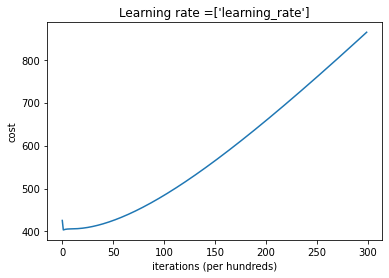

In [18]:
# Plot learning curve (with costs)
#costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(["learning_rate"]))
plt.show()